# CS166 LBA Notebook

### Traffic Visualization: Interpreting Congestion on the Road Network

The visualizations below show a road network in a particular address using OpenStreetMap data and simulated car traffic over several time steps.

Each **edge (road segment)** is styled according to the **traffic density** on that road, not just the raw number of cars.

- **Color (plasma colormap)**  
  - Dark purple/blue edges have **zero or low density** (effectively no cars relative to their capacity).  
  - Edges transition through **pink/magenta and orange/yellow** as density increases (more cars packed into a given road length).  
  - The brightest **yellow edges** indicate the **highest density** (most congested roads).  
  - The color scale is normalized from `0` up to the **maximum density** observed on any road in this simulation.  
  - This maximum density is computed by taking the **largest value of**
    $$\text{density} = \frac{\text{cars on road}}{\text{road capacity}}$$
  - The colorbar on the side shows the transition of **traffic density** values. 

The goal of this visualization is to make **congested roads visually stand out**:
roads that are both **Deep purple** are those with the **highest simulated density** (cars per unit of road capacity).
By visually selecting for these segments, we can quickly identify which parts of the network are most congested in the current simulation scenario.

## Task 1 - Debugging

In [1]:
#!pip install osmnx

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from simulation.classes import TrafficNetwork

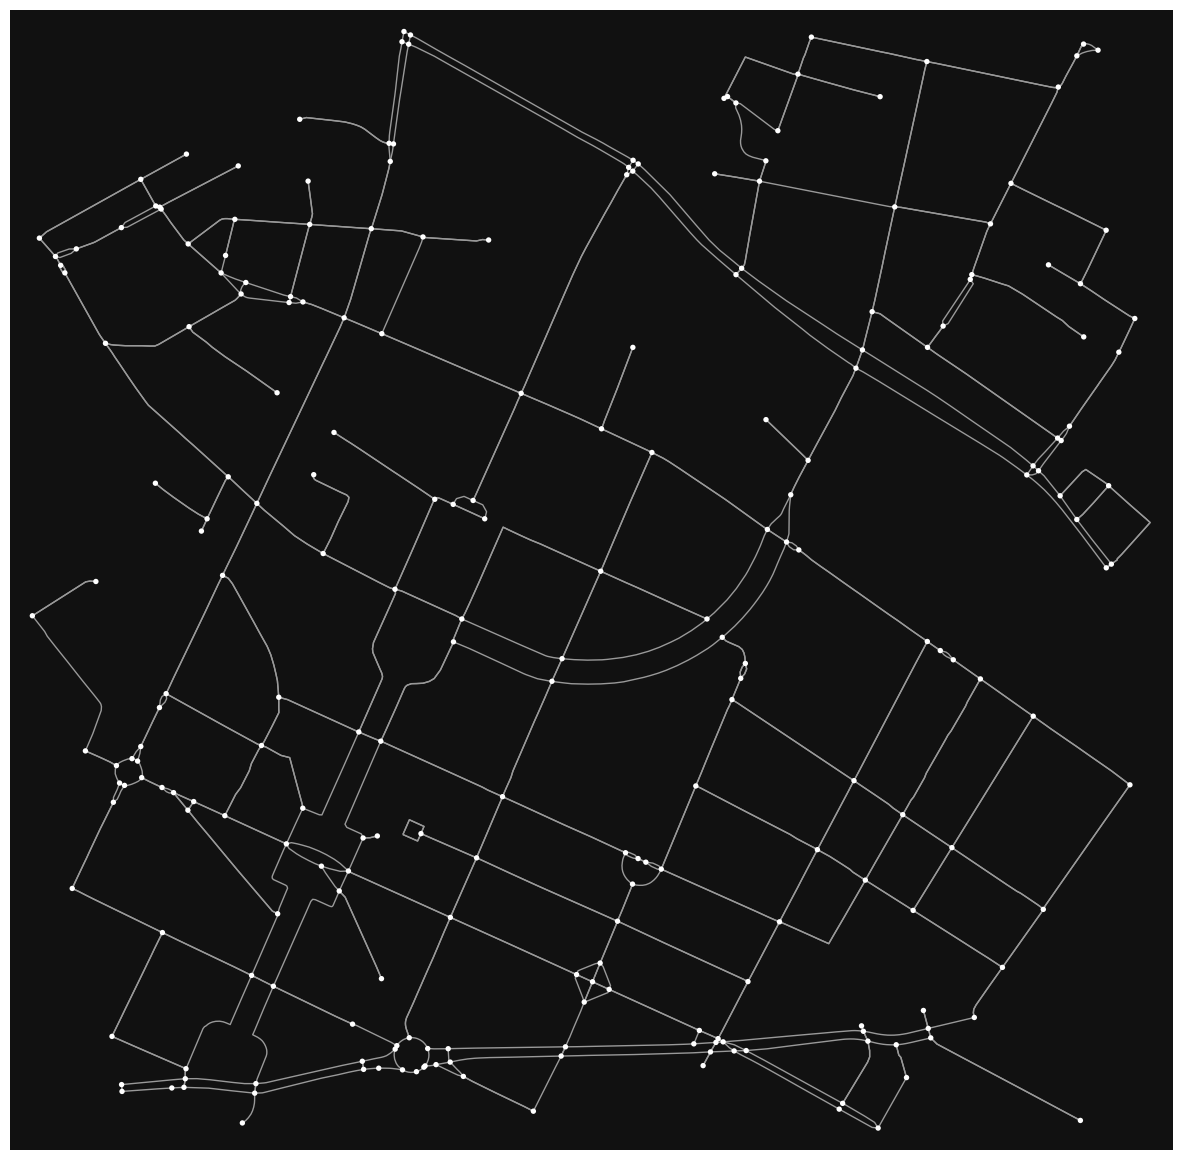

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [3]:
# Initialize traffic network with 1000 cars
network = TrafficNetwork(num_cars=1000)

# Load road network from OpenStreetMap for the specified address
# dist=1000 means we fetch roads within 1000 meters of the address
# network_type="drive" means we only get drivable roads (no pedestrian or bike paths)
network.load_road_network(address="Adalbertstraße 58, Berlin, Germany", dist=1000, network_type="drive")

# Add travel time attributes to each edge based on road length and speed limits
network.add_travel_time_attribute()

# Plot the base road network (without traffic)
network.plot_road_network()


Step 1:
  Moving: 99, Parked: 1
  Average speed: 5.00 kph

Step 2:
  Moving: 99, Parked: 1
  Average speed: 4.76 kph

Step 3:
  Moving: 99, Parked: 1
  Average speed: 4.81 kph

Step 4:
  Moving: 99, Parked: 1
  Average speed: 4.85 kph

Step 5:
  Moving: 99, Parked: 1
  Average speed: 4.86 kph

Step 6:
  Moving: 99, Parked: 1
  Average speed: 4.88 kph

Step 7:
  Moving: 99, Parked: 1
  Average speed: 4.89 kph

Step 8:
  Moving: 99, Parked: 1
  Average speed: 4.96 kph

Step 9:
  Moving: 99, Parked: 1
  Average speed: 4.98 kph

Step 10:
  Moving: 99, Parked: 1
  Average speed: 4.96 kph


(<Figure size 1500x1500 with 2 Axes>, <Axes: >)

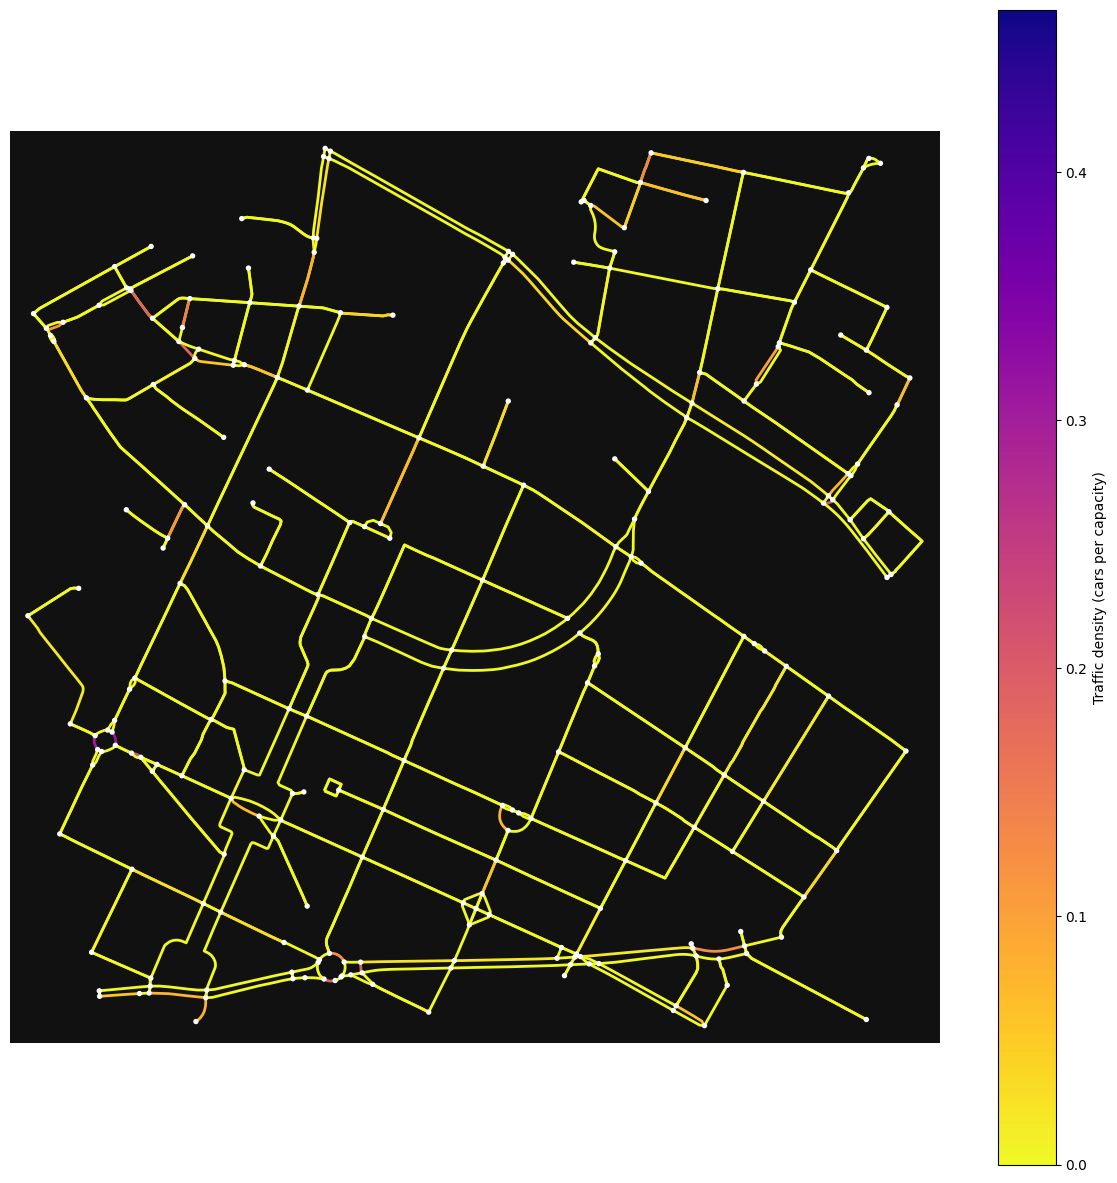

In [4]:
# Run the traffic simulation for 10 time steps (default)
# This simulates cars moving through the network, choosing routes, and updating positions
network.simulate_traffic()

# Visualize the network with traffic density using the plasma colormap
# Yellow = low density, Purple/blue = high density (congestion)

network.plot_network_with_osmnx() # shows the original density colored roads

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

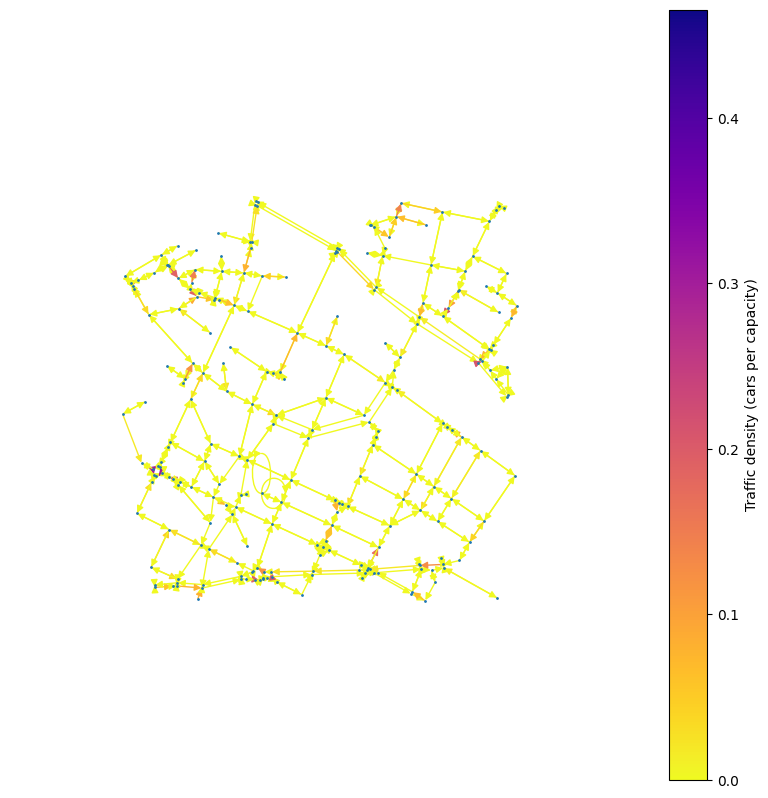

In [5]:
network.plot_network_with_networkx() # shows a multi-directed graph